In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clustered data (adjust path as needed)
data_path = '../../data/nifty/train/full_featured.csv'
df = pd.read_csv(data_path)

# If you have a saved clustered DataFrame, load it here instead
# df = pd.read_csv('path_to_clustered_data.csv')

# If needed, re-run clustering to get the 'cluster' column
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd','trend_code'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters
df_clustered.head()

,date,open,high,low,close,volume,daily_return,log_return,price_range,ma_5,...,volatility_20,rsi_14,macd_12_26,macd_signal_12_26,macd_histogram_12_26,macd_signal_strength,stoch_14,stoch_smoothk,stoch_smoothd,cluster
33,2001-02-16 00:00:00+05:30,1415.85,1422.95,1376.15,1381.35,0,-0.024952,-0.025269,46.8,1396.96,...,0.013554,56.121245,24.611369,26.630119,-2.018750,2.018750,49.268293,74.394226,79.212137,2
34,2001-02-19 00:00:00+05:30,1381.40,1392.05,1369.45,1384.80,0,0.002498,0.002494,22.6,1393.48,...,0.013097,56.975273,22.668833,25.837862,-3.169029,3.169029,53.475610,66.265109,74.632775,2
35,2001-02-20 00:00:00+05:30,1384.85,1392.80,1380.40,1383.85,0,-0.000686,-0.000686,12.4,1392.01,...,0.012794,56.648313,20.812784,24.832846,-4.020062,4.020062,52.317073,51.686992,64.115442,2
36,2001-02-21 00:00:00+05:30,1383.90,1389.55,1364.25,1370.10,0,-0.009936,-0.009986,25.3,1387.36,...,0.013000,51.997258,18.024566,23.471190,-5.446624,5.446624,21.877310,42.556664,53.502922,0
37,2001-02-22 00:00:00+05:30,1370.05,1370.05,1335.65,1355.10,0,-0.010948,-0.011008,34.4,1375.04,...,0.013127,47.422941,14.438076,21.664568,-7.226491,7.226491,22.279496,32.157960,42.133872,0


In [2]:
# Mean and std of features by cluster
profile = df_clustered.groupby('cluster')[features].agg(['mean', 'std'])
profile

daily_return           log_return           price_range              \
                mean       std       mean       std        mean         std   
cluster                                                                       
0          -0.002873  0.016890  -0.003022  0.017032  122.814928  103.485323   
1           0.001190  0.008115   0.001157  0.008116  178.658939  111.873925   
2           0.003106  0.010855   0.003043  0.010728   64.882453   43.196381   

                 ma_5                      ma_20               ...  \
                 mean          std          mean          std  ...   
cluster                                                        ...   
0         7806.357921  6175.678180   7937.640933  6246.152648  ...   
1        18327.288983  4729.488659  18084.297396  4728.357039  ...   
2         5409.895829  3249.164667   5325.452164  3226.397212  ...   

        macd_signal_12_26             macd_histogram_12_26             \
                     mean         std                 mean        std   
cluster                                                                 
0              -32.887586  106.149180           -22.725462  31.835919   
1              150.008634  121.775729            18.806253  44.510496   
2               32.494563   64.039568            11.967345  20.148017   

          stoch_14            stoch_smoothk            stoch_smoothd  \
              mean        std          mean        std          mean   
cluster                                                                
0        25.685013  17.775094     26.816801  15.236417     29.051377   
1        76.963521  20.983127     77.805907  17.875927     77.863292   
2        81.047192  15.700417     79.848909  14.208716     78.031214   

                    
               std  
cluster             
0        16.590436  
1        17.342404  
2        15.847519  

[3 rows x 28 columns]

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_3752\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_3752\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_3752\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Loc

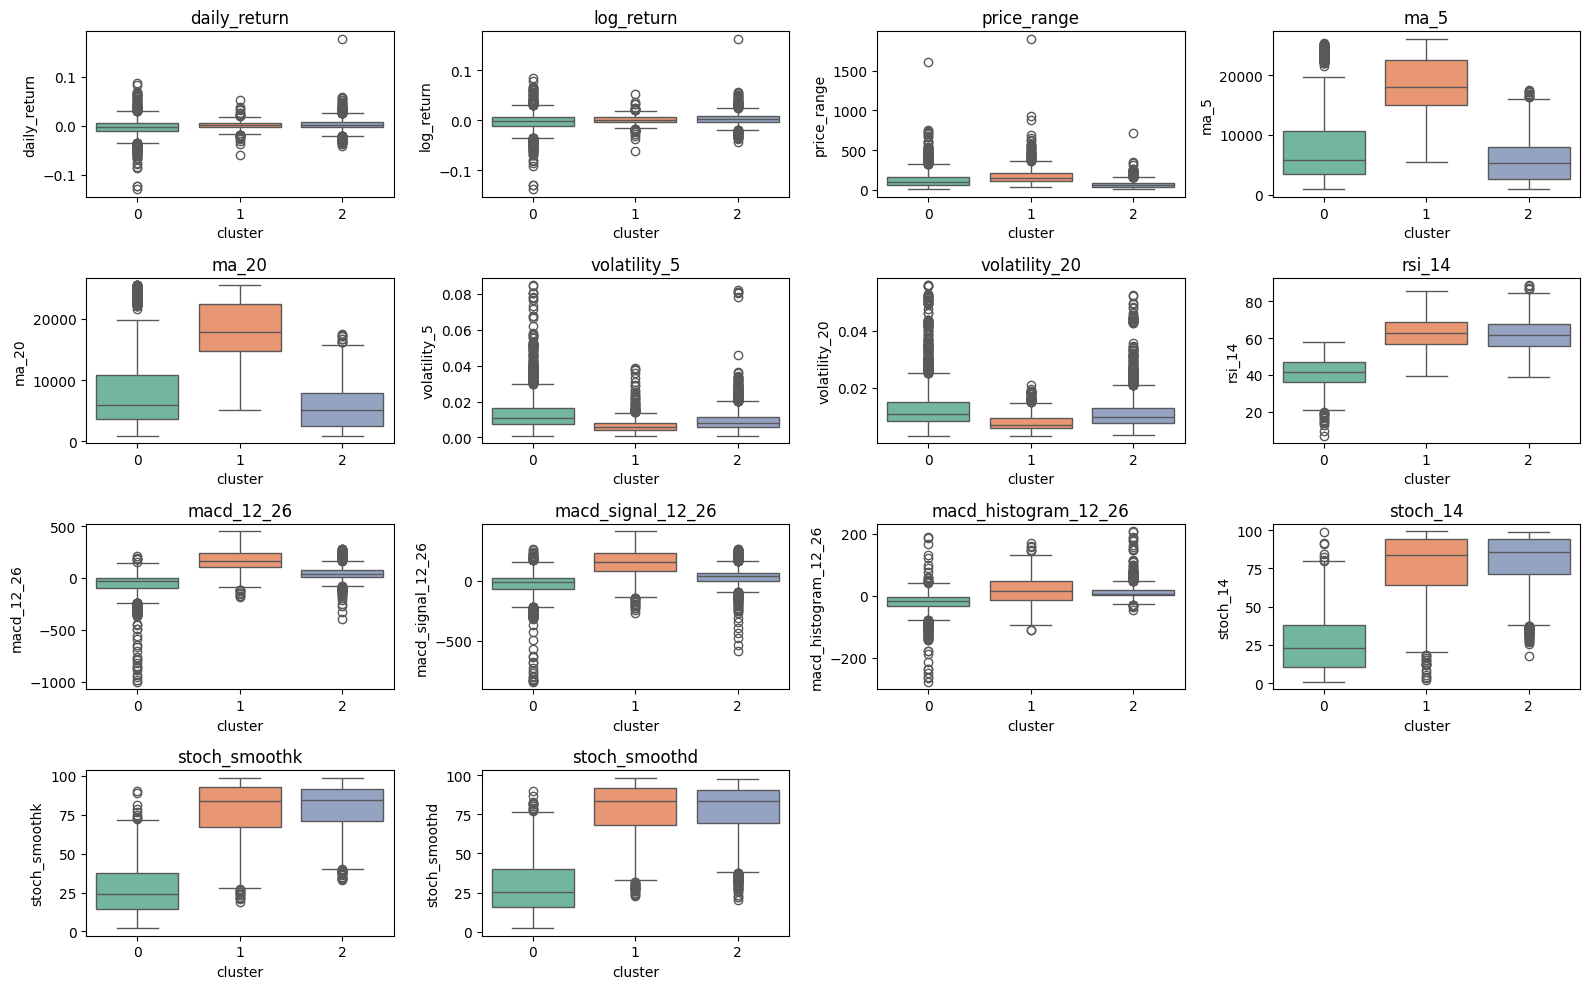

In [3]:
# Boxplots for each feature by cluster
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
    plt.title(feature)
    plt.tight_layout()
plt.show()